# Описание проекта

Коммерческий департамент компании «Мегалайн» хочет понять, какой тариф приносит больше денег. Это нужно для того, чтобы скорректировать рекламный бюджет.

# Описание тарифов

* Тариф «Смарт»:
    * Ежемесячная плата: 550 рублей
    * Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    * Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.
* Тариф «Ультра»:
    * Ежемесячная плата: 1950 рублей
    * Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    * Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.
    
    
**Примечание:**
        «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.
    
    
# Описание данных

* Таблица users (информация о пользователях):
    * user_id — уникальный идентификатор пользователя
    * first_name — имя пользователя
    * last_name — фамилия пользователя
    * age — возраст пользователя (годы)
    * reg_date — дата подключения тарифа (день, месяц, год)
    * churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    * city — город проживания пользователя
    * tarif — название тарифного плана
* Таблица calls (информация о звонках):
    * id — уникальный номер звонка
    * call_date — дата звонка
    * duration — длительность звонка в минутах
    * user_id — идентификатор пользователя, сделавшего звонок
* Таблица messages (информация о сообщениях):
    * id — уникальный номер сообщения
    * message_date — дата сообщения
    * user_id — идентификатор пользователя, отправившего сообщение
* Таблица internet (информация об интернет-сессиях):
    * id — уникальный номер сессии
    * mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
    * session_date — дата интернет-сессии
    * user_id — идентификатор пользователя
* Таблица tariffs (информация о тарифах):
    * tariff_name — название тарифа
    * rub_monthly_fee — ежемесячная абонентская плата в рублях
    * minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
    * messages_included — количество сообщений в месяц, включённых в абонентскую плату
    * mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    * rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    * rub_per_message — стоимость отправки сообщения сверх тарифного пакета
    * rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Изучение общей информации

Импортируем необходимые библиотеки для выполнения проекта.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

Прочитаем данные файлы и назовем их:
* df_users - информация о пользователях; 
* df_calls - информация о звонках;
* df_mess - информация о сообщениях;
* df_net - информация об интернет-сессиях;
* df_tariff - информация о тарифах.

In [2]:
df_users = pd.read_csv('/datasets/users.csv')
df_users.name = 'Информация о пользователях'

In [3]:
df_calls = pd.read_csv('/datasets/calls.csv')
df_calls.name = 'Информация о звонках'

In [4]:
df_mess = pd.read_csv('/datasets/messages.csv')
df_mess.name = 'Информация о сообщениях'

In [5]:
df_net = pd.read_csv('/datasets/internet.csv')
df_net.name = 'Информация об интернет-сессиях'

In [6]:
df_tariff = pd.read_csv('/datasets/tariffs.csv')
df_tariff.name = 'Информация о тарифах'

Напишем фукнцию def для быстрого вывода определенной информации для каждой таблицы.

In [7]:
def inf(data: 'DataFrame'):
    print(data.name)
    print()
    print('Описание данных таблицы')
    print(data.info())
    print('================================================')
    print('Процент пропусков в таблице')
    print(data.isna().mean())
    print('================================================')
    print('Визуальный осмотр данных таблицы')
    display(data.sample(5))

In [8]:
inf(df_users)

Информация о пользователях

Описание данных таблицы
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
Процент пропусков в таблице
user_id       0.000
age           0.000
churn_date    0.924
city          0.000
first_name    0.000
last_name     0.000
reg_date      0.000
tariff        0.000
dtype: float64
Визуальный осмотр данных таблицы


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
432,1432,48,NaN,Улан-Удэ,Анвар,Кочетков,2018-08-04,smart
449,1449,55,NaN,Москва,Дана,Новикова,2018-07-16,smart
227,1227,66,NaN,Санкт-Петербург,Раиса,Калинина,2018-01-09,smart
388,1388,24,NaN,Вологда,Рустам,Левин,2018-08-27,smart
448,1448,42,NaN,Кострома,Ростислав,Дроздов,2018-09-16,smart


В таблице df_users в столбце churn_date присутствует 92% пропусков, но так как этот столбец характеризует дату прекращения пользования тарифом, то пропущенные данные обозначают, что клиент на момент выгрузки информации все еще пользовался услугами компании, поэтому не будем удалять и заполнять эти пропуски.
Значения в столбцах churn_date и reg_date имеют некорректный тип данных object, поэтому надо изменить его на тип datetime64.

In [9]:
inf(df_calls)

Информация о звонках

Описание данных таблицы
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None
Процент пропусков в таблице
id           0.0
call_date    0.0
duration     0.0
user_id      0.0
dtype: float64
Визуальный осмотр данных таблицы


,id,call_date,duration,user_id
75810,1189_478,2018-05-30,12.17,1189
162136,1398_48,2018-12-27,0.00,1398
38201,1095_29,2018-12-23,8.98,1095
73078,1184_52,2018-12-20,0.00,1184
97261,1248_104,2018-08-19,16.59,1248


В таблице df_calls в столбце call_date надо также произвести замену типа данных с object на datetime64.

In [10]:
inf(df_mess)

Информация о сообщениях

Описание данных таблицы
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None
Процент пропусков в таблице
id              0.0
message_date    0.0
user_id         0.0
dtype: float64
Визуальный осмотр данных таблицы


,id,message_date,user_id
102109,1416_426,2018-09-02,1416
33195,1145_848,2018-10-13,1145
78584,1330_610,2018-09-05,1330
66619,1284_207,2018-11-05,1284
84982,1355_79,2018-11-09,1355


Также требуется изменить тип данных в столбце message_date с object на datetime64.

In [11]:
inf(df_net)

Информация об интернет-сессиях

Описание данных таблицы
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None
Процент пропусков в таблице
Unnamed: 0      0.0
id              0.0
mb_used         0.0
session_date    0.0
user_id         0.0
dtype: float64
Визуальный осмотр данных таблицы


,Unnamed: 0,id,mb_used,session_date,user_id
142429,142429,1477_326,670.70,2018-09-20,1477
127460,127460,1427_279,0.00,2018-05-22,1427
59833,59833,1203_81,345.88,2018-05-04,1203
24443,24443,1083_323,21.55,2018-07-13,1083
18170,18170,1063_191,498.21,2018-07-31,1063


При выгрузке данных в таблицу df_net дублировался столбец c индексами строк *Unnamed: 0* и , следовательно, его нужно удалить. 
Опять же в столбце session_date требуется изменить тип данных на datetime64.

In [12]:
df_tariff.info()
df_tariff

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В таблице df_tariff все в порядке.

### Вывод

Предоставленные данные находятся в практически идеальном состоянии, кроме того, что надо изменить все данные с датами на соответсвующий тип, также необходимо удалить столбец *Unnamed: 0* в таблице df_net, который дублирует индексы в таблице и попал в таблицу по ошибке.

## Предобработка данных

Первым делом поменяем типы данных в столбцах с датами на datetime64.

In [13]:
df_users['churn_date'] = pd.to_datetime((df_users['churn_date']), format = '%Y-%m-%d')

In [14]:
df_users['reg_date'] = pd.to_datetime((df_users['reg_date']), format = '%Y-%m-%d')

In [15]:
df_calls['call_date'] = pd.to_datetime((df_calls['call_date']), format = '%Y-%m-%d')

In [16]:
df_mess['message_date'] = pd.to_datetime((df_mess['message_date']), format = '%Y-%m-%d')

In [17]:
df_net['session_date'] = pd.to_datetime((df_net['session_date']), format = '%Y-%m-%d')

Удалим ненужный столбец *Unnamed: 0* в таблице df_net.

In [18]:
df_net = df_net.drop('Unnamed: 0', axis = 1)

Проверим все таблицы на наличие дубликатов.

In [19]:
print('Количество дубликатов в таблице df_users: {:}'.format(df_users.duplicated().sum()))
print('Количество дубликатов в таблице df_mess: {:}'.format(df_mess.duplicated().sum()))
print('Количество дубликатов в таблице df_calls: {:}'.format(df_calls.duplicated().sum()))
print('Количество дубликатов в таблице df_net: {:}'.format(df_net.duplicated().sum()))

Количество дубликатов в таблице df_users: 0
Количество дубликатов в таблице df_mess: 0
Количество дубликатов в таблице df_calls: 0
Количество дубликатов в таблице df_net: 0


Дубликаты не обнаружены.

Так как каждый звонок округляется отдельно(даже если он длился всего 1 секунду, будет засчитан как 1 минута), то округлим значение каждого звонка до ближайшего целого числа.

In [20]:
df_calls['duration'] = df_calls['duration'].apply(np.ceil)

### Вывод

В этом пункте мы проделали следующие шаги:
* замена типа данных в столбцах churn_date, reg_date, call_date, message_date, session_date с object на datetime64;
* удаление столбца *Unnamed: 0* из таблицы df_net;
* проверка на отстутствие дубликатов;
* округление значения длительности звонка в большую сторону для правильного подсчета выручки с каждого клиента.

## Подготовка данных к анализу

Для удобства анализа сгруппируем данные по месяцам и по пользователям в таблицах df_calls, df_mess, df_net, суммируя значения длительности звонка, количества сообщений и объема трафика, соответственно. Для этого нужно сначала добавить столбец со значением месяца в каждую из таблиц.

Добавим столбец month в таблицу df_calls.

In [21]:
df_calls['month'] = df_calls['call_date'].dt.month

Сгруппируем данные в таблице df_calls по месяцам и по пользователям, суммируя значения длительности звонка, составив сводную таблицу.

In [22]:
df_calls_pivot = df_calls.pivot_table(index = ['month', 'user_id'], values = 'duration', aggfunc = ['sum', 'count'])

Переименуем названия столбцов на более подходящее.

In [23]:
df_calls_pivot.columns = ['calls_duration','calls_count']
df_calls_pivot

calls_duration  calls_count
month user_id                             
1     1005               95.0           15
      1032              380.0           61
      1045                9.0            1
      1055              551.0           64
      1071              194.0           24
...                       ...          ...
12    1494              418.0           62
      1495             1031.0          155
      1496              518.0           80
      1497              545.0           71
      1499              492.0           69

[3174 rows x 2 columns]

Добавим столбец month в таблицу df_mess.

In [24]:
df_mess['month'] = df_mess['message_date'].dt.month

Сгруппируем данные в таблице df_mess по месяцам и по пользователям, считая количество сообщений, составив сводную таблицу.

In [25]:
df_mess_pivot = df_mess.pivot_table(index = ['month', 'user_id'], values = 'id', aggfunc = 'count')

Переименуем названия столбца id на более подходящее.

In [26]:
df_mess_pivot.columns = ['messages_count']
df_mess_pivot

messages_count
month user_id                
1     1005                  7
      1032                 38
      1045                  5
      1055                 30
      1071                 16
...                       ...
12    1493                 78
      1495                 84
      1496                 51
      1497                 17
      1499                 66

[2717 rows x 1 columns]

Добавим столбец month в таблицу df_net.

In [27]:
df_net['month'] = df_net['session_date'].dt.month

Сгруппируем данные в таблице df_net по месяцам и по пользователям, суммируя объем трафика, составив сводную таблицу.

In [28]:
df_net_pivot = df_net.pivot_table(index = ['month', 'user_id'], values = 'mb_used', aggfunc = 'sum')
df_net_pivot

mb_used
month user_id          
1     1005      2727.97
      1032     24127.69
      1045      2346.71
      1055     17090.88
      1071     15604.34
...                 ...
12    1494     17621.21
      1495     23426.76
      1496     20736.15
      1497     19918.60
      1499     13055.58

[3203 rows x 1 columns]

Посчитаем суммарное количество гигабайт трафика за месяц на каждого клиента, разделив столбец mb_used на 1024. Теперь будем работать со значением объема трафика в гигабайтах. 
Удалим столбец mb_used за ненадобностью.

In [29]:
mb_in_gb = 1024
df_net_pivot['gb_used'] = df_net_pivot['mb_used'] / mb_in_gb
df_net_pivot = df_net_pivot.drop('mb_used', axis = 1)
df_net_pivot

gb_used
month user_id           
1     1005      2.664033
      1032     23.562197
      1045      2.291709
      1055     16.690313
      1071     15.238613
...                  ...
12    1494     17.208213
      1495     22.877695
      1496     20.250146
      1497     19.451758
      1499     12.749590

[3203 rows x 1 columns]

Постепенно объеденим эти сводные таблицы в одну с помощью функции merge, обнулив индексы.

In [30]:
df_call_mess = df_calls_pivot.merge(df_mess_pivot,on=['user_id','month'],how='outer')
df_call_mess_net = df_call_mess.merge(df_net_pivot,on=['user_id','month'],how='outer').reset_index()
df_call_mess_net

,user_id,month,calls_duration,calls_count,messages_count,gb_used
0,1005,1,95.0,15.0,7.0,2.664033
1,1032,1,380.0,61.0,38.0,23.562197
2,1045,1,9.0,1.0,5.0,2.291709
3,1055,1,551.0,64.0,30.0,16.690313
4,1071,1,194.0,24.0,16.0,15.238613
...,...,...,...,...,...,...
3209,1231,12,NaN,NaN,191.0,31.687500
3210,1328,12,NaN,NaN,7.0,38.495830
3211,1473,12,NaN,NaN,20.0,17.986582
3212,1489,12,NaN,NaN,35.0,16.916514


Для проведения анализа в таблице не хватает только информации по тарифам и по месту проживания.
Объеденим полученную таблицу с таблицей df_users, так как только там находятся необходимые данные.

In [31]:
df_final = df_call_mess_net.merge(df_users,on=['user_id'], how = 'inner')
df_final

,user_id,month,calls_duration,calls_count,messages_count,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1005,1,95.0,15.0,7.0,2.664033,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
1,1005,2,456.0,69.0,38.0,7.210869,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
2,1005,3,606.0,77.0,56.0,10.843994,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
3,1005,4,712.0,101.0,41.0,9.132539,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
4,1005,5,595.0,73.0,42.0,7.681182,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,11,NaN,NaN,20.0,17.081602,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3210,1489,12,NaN,NaN,35.0,16.916514,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3211,1328,10,NaN,NaN,6.0,21.902324,44,NaT,Мурманск,Рауль,Аркадьев,2018-10-16,ultra
3212,1328,11,NaN,NaN,8.0,34.692949,44,NaT,Мурманск,Рауль,Аркадьев,2018-10-16,ultra


Удалим ненужные столбцы из полученной таблицы и заменим пустые значения на ноль, так как возможно, что клиент просто не пользовался какой-либо из предоставленных услуг, например, отправкой сообщений.

In [32]:
df_final = df_final.drop('age', axis = 1)
df_final = df_final.drop('churn_date', axis = 1)
df_final = df_final.drop('first_name', axis = 1)
df_final = df_final.drop('last_name', axis = 1)
df_final = df_final.drop('reg_date', axis = 1)

df_final = df_final.fillna(0)

df_final

,user_id,month,calls_duration,calls_count,messages_count,gb_used,city,tariff
0,1005,1,95.0,15.0,7.0,2.664033,Набережные Челны,smart
1,1005,2,456.0,69.0,38.0,7.210869,Набережные Челны,smart
2,1005,3,606.0,77.0,56.0,10.843994,Набережные Челны,smart
3,1005,4,712.0,101.0,41.0,9.132539,Набережные Челны,smart
4,1005,5,595.0,73.0,42.0,7.681182,Набережные Челны,smart
...,...,...,...,...,...,...,...,...
3209,1489,11,0.0,0.0,20.0,17.081602,Санкт-Петербург,smart
3210,1489,12,0.0,0.0,35.0,16.916514,Санкт-Петербург,smart
3211,1328,10,0.0,0.0,6.0,21.902324,Мурманск,ultra
3212,1328,11,0.0,0.0,8.0,34.692949,Мурманск,ultra


Получили таблицу со всеми необходимыми данными, которые нам потребуются для анализа. Осталось только округлить значение объема израсходованного трафика до ближайшего большего целого, что бы правильно посчитать выручку с каждого клиента согласно примечанию к тарифам.

In [33]:
df_final['gb_used'] = df_final['gb_used'].apply(np.ceil)
df_final

,user_id,month,calls_duration,calls_count,messages_count,gb_used,city,tariff
0,1005,1,95.0,15.0,7.0,3.0,Набережные Челны,smart
1,1005,2,456.0,69.0,38.0,8.0,Набережные Челны,smart
2,1005,3,606.0,77.0,56.0,11.0,Набережные Челны,smart
3,1005,4,712.0,101.0,41.0,10.0,Набережные Челны,smart
4,1005,5,595.0,73.0,42.0,8.0,Набережные Челны,smart
...,...,...,...,...,...,...,...,...
3209,1489,11,0.0,0.0,20.0,18.0,Санкт-Петербург,smart
3210,1489,12,0.0,0.0,35.0,17.0,Санкт-Петербург,smart
3211,1328,10,0.0,0.0,6.0,22.0,Мурманск,ultra
3212,1328,11,0.0,0.0,8.0,35.0,Мурманск,ultra


Теперь уже можно посчитать прибыль с каждого клиента в определенный месяц. Для этого вычтем бесплатный лимит из суммарного количества длительности звонков, сообщений и интернет-трафика, затем остаток умножим на значение из тарифного плана и прибавим абонентскую плату, соответствующую тарифному плану. Сначала извлечем данные по каждому из показателей из таблицы с тарифами.

In [34]:
gb_included_smart = (df_tariff['mb_per_month_included'] / mb_in_gb)[0]
gb_included_ultra = (df_tariff['mb_per_month_included'] / mb_in_gb)[1]
    
rub_per_gb_smart = (df_tariff['rub_per_gb'])[0]
rub_per_gb_ultra = (df_tariff['rub_per_gb'])[1]
    
messages_included_smart = (df_tariff['messages_included'])[0]
messages_included_ultra = (df_tariff['messages_included'])[1]
    
rub_per_message_smart = (df_tariff['rub_per_message'])[0]
rub_per_message_ultra = (df_tariff['rub_per_message'])[1]
    
minutes_included_smart = (df_tariff['minutes_included'])[0]
minutes_included_ultra = (df_tariff['minutes_included'])[1]
    
rub_per_minute_smart = (df_tariff['rub_per_minute'])[0]
rub_per_minute_ultra = (df_tariff['rub_per_minute'])[1]

rub_monthly_fee_smart = df_tariff['rub_monthly_fee'][0]
rub_monthly_fee_ultra = df_tariff['rub_monthly_fee'][1]

print('Объём интернет-трафика, включённого в абонентскую плату в гигабайтах тарифа "Смарт": {:}'.format(gb_included_smart))
print('Объём интернет-трафика, включённого в абонентскую плату в гигабайтах тарифа "Ультра": {:}'.format(gb_included_ultra))

print('Стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета "Смарт": {:}'.format(rub_per_gb_smart))
print('Стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета "Ультра": {:}'.format(rub_per_gb_ultra))

print('Количество сообщений в месяц, включённых в абонентскую плату тарифа "Смарт": {:}'.format(messages_included_smart))
print('Количество сообщений в месяц, включённых в абонентскую плату тарифа "Ультра": {:}'.format(messages_included_ultra))

print('Cтоимость отправки сообщения сверх тарифного пакета "Смарт": {:}'.format(rub_per_message_smart))
print('Cтоимость отправки сообщения сверх тарифного пакета "Ультра": {:}'.format(rub_per_message_ultra))

print('Количество минут разговора в месяц, включённых в абонентскую плату тарифа "Смарт": {:}'.format(minutes_included_smart))
print('Количество минут разговора в месяц, включённых в абонентскую плату тарифа "Ультра": {:}'.format(minutes_included_ultra))

print('Cтоимость минуты разговора сверх тарифного пакета "Смарт": {:}'.format(rub_per_minute_smart))
print('Cтоимость минуты разговора сверх тарифного пакета "Ультра": {:}'.format(rub_per_minute_ultra))

print('Ежемесячная абонентская плата в рублях пакета "Смарт": {:}'.format(rub_monthly_fee_smart))
print('Ежемесячная абонентская плата в рублях пакета "Ультра": {:}'.format(rub_monthly_fee_ultra))

Объём интернет-трафика, включённого в абонентскую плату в гигабайтах тарифа "Смарт": 15.0
Объём интернет-трафика, включённого в абонентскую плату в гигабайтах тарифа "Ультра": 30.0
Стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета "Смарт": 200
Стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета "Ультра": 150
Количество сообщений в месяц, включённых в абонентскую плату тарифа "Смарт": 50
Количество сообщений в месяц, включённых в абонентскую плату тарифа "Ультра": 1000
Cтоимость отправки сообщения сверх тарифного пакета "Смарт": 3
Cтоимость отправки сообщения сверх тарифного пакета "Ультра": 1
Количество минут разговора в месяц, включённых в абонентскую плату тарифа "Смарт": 500
Количество минут разговора в месяц, включённых в абонентскую плату тарифа "Ультра": 3000
Cтоимость минуты разговора сверх тарифного пакета "Смарт": 3
Cтоимость минуты разговора сверх тарифного пакета "Ультра": 1
Ежемесячная абонентская плата в рублях пакета "Смар

Напишем функцию profit_from_user для подсчета выручки с каждого клиента за определенный месяц.

In [35]:
def profit_from_user(row):

    internet_profit = 0
    messages_profit = 0 
    calls_profit = 0
    
    if row['tariff'] == 'smart':
        
        if row['gb_used'] > gb_included_smart:
            internet_profit = (row['gb_used'] - gb_included_smart) * rub_per_gb_smart
            
        if row['calls_duration'] > minutes_included_smart:
            calls_profit = (row['calls_duration'] - minutes_included_smart) * rub_per_minute_smart
            
        if row['messages_count'] > messages_included_smart:
            messages_profit = (row['messages_count'] - messages_included_smart) * rub_per_message_smart
        
        return internet_profit + calls_profit + messages_profit + rub_monthly_fee_smart
    
    if row['tariff'] == 'ultra':
        
        if row['gb_used'] > gb_included_ultra:
            internet_profit = (row['gb_used'] - gb_included_ultra) * rub_per_gb_ultra
            
        if row['calls_duration'] > minutes_included_ultra:
            calls_profit = (row['calls_duration'] - minutes_included_ultra) * rub_per_minute_ultra
            
        if row['messages_count'] > messages_included_ultra:
            messages_profit = (row['messages_count'] - messages_included_ultra) * rub_per_message_ultra
            
        return internet_profit + calls_profit + messages_profit + rub_monthly_fee_ultra

Применим эту функцию и выведем полученный результат.

In [36]:
df_final['profit'] = df_final.apply(profit_from_user, axis = 1)
df_final

,user_id,month,calls_duration,calls_count,messages_count,gb_used,city,tariff,profit
0,1005,1,95.0,15.0,7.0,3.0,Набережные Челны,smart,550.0
1,1005,2,456.0,69.0,38.0,8.0,Набережные Челны,smart,550.0
2,1005,3,606.0,77.0,56.0,11.0,Набережные Челны,smart,886.0
3,1005,4,712.0,101.0,41.0,10.0,Набережные Челны,smart,1186.0
4,1005,5,595.0,73.0,42.0,8.0,Набережные Челны,smart,835.0
...,...,...,...,...,...,...,...,...,...
3209,1489,11,0.0,0.0,20.0,18.0,Санкт-Петербург,smart,1150.0
3210,1489,12,0.0,0.0,35.0,17.0,Санкт-Петербург,smart,950.0
3211,1328,10,0.0,0.0,6.0,22.0,Мурманск,ultra,1950.0
3212,1328,11,0.0,0.0,8.0,35.0,Мурманск,ultra,2700.0


Получили таблицу с которой можно работать.

### Вывод

В ходе выполнения этого пункта были проделаны следующие действия:
 * создание столбца month в каждой из таблиц;
 * создание сводных таблиц по месяцу и пользователю с подсчетом продолжительности звонков и их количества, количества сообщений, объема трафика в гигабйтах;
 * объединение этих таблиц для получения общей таблицы с данными, по каждой из услуг;
 * добавление информации с выручкой с каждого из клиентов по определенному месяцу.

## Анализ данных

Разобъем полученную таблицу на две для каждого тарифа.

In [37]:
df_smart = df_final[df_final['tariff'] == 'smart']

df_ultra = df_final[df_final['tariff'] == 'ultra']

print('Таблица поведения клиентов тарифа "Смарт"')
display(df_smart.sample(5))
print('Таблица поведения клиентов тарифа "Ультра"')
display(df_ultra.sample(5))

Таблица поведения клиентов тарифа "Смарт"


,user_id,month,calls_duration,calls_count,messages_count,gb_used,city,tariff,profit
1874,1248,5,105.0,16.0,0.0,3.0,Москва,smart,550.0
149,1176,10,288.0,43.0,38.0,18.0,Волгоград,smart,1150.0
516,1006,10,267.0,44.0,0.0,20.0,Ульяновск,smart,1550.0
290,1337,11,188.0,27.0,16.0,19.0,Вологда,smart,1350.0
2834,1202,10,363.0,55.0,27.0,29.0,Владивосток,smart,3350.0


Таблица поведения клиентов тарифа "Ультра"


,user_id,month,calls_duration,calls_count,messages_count,gb_used,city,tariff,profit
567,1152,6,291.0,37.0,0.0,27.0,Мурманск,ultra,1950.0
3199,1231,11,0.0,0.0,173.0,27.0,Чебоксары,ultra,1950.0
2941,1028,12,1189.0,143.0,171.0,16.0,Тверь,ultra,1950.0
1736,1019,7,453.0,60.0,16.0,18.0,Томск,ultra,1950.0
1159,1360,6,791.0,100.0,0.0,8.0,Санкт-Петербург,ultra,1950.0


### Длительность звонков

Опишем поведение клиентов по длительности звонков по каждому из месяцев для каждого из тарифов.
Посчитаем среднее, медиану, дисперсию и среднее отклонение для этого показателя для каждого из тарифов.

In [38]:
print('Сатистические показатели длительности звонка в минутах для тарифа "Смарт"')

print('Среднее арифметическое: {:.0f}'.format(df_smart['calls_duration'].mean()))
print('Медиана: {:.0f}'.format(df_smart['calls_duration'].median()))
print('Дисперсия: {:.0f}'.format(np.var(df_smart['calls_duration'])))
print('Среднее отклонение: {:.0f} \n'.format(np.std(df_smart['calls_duration'])))
    
print('Сатистические показатели длительности звонка в минутах для тарифа "Ультра"')


print('Среднее арифметическое: {:.0f}'.format(df_ultra['calls_duration'].mean()))
print('Медиана: {:.0f}'.format(df_ultra['calls_duration'].median()))
print('Дисперсия: {:.0f}'.format(np.var(df_ultra['calls_duration'])))
print('Среднее отклонение: {:.0f} \n'.format(np.std(df_ultra['calls_duration'])))

Сатистические показатели длительности звонка в минутах для тарифа "Смарт"
Среднее арифметическое: 418
Медиана: 422
Дисперсия: 36203
Среднее отклонение: 190 

Сатистические показатели длительности звонка в минутах для тарифа "Ультра"
Среднее арифметическое: 527
Медиана: 518
Дисперсия: 100771
Среднее отклонение: 317 



In [40]:
print('Дисперсия c ddof = 0 (по умолчанию): {:.20f}'.format(np.var(df_smart['calls_duration'], ddof = 0)))
print('Дисперсия с ddof = 1: {:.20f}'.format(np.var(df_smart['calls_duration'], ddof = 1)))

Дисперсия c ddof = 0 (по умолчанию): 36203.06665209469065302983
Дисперсия с ddof = 1: 36219.31578434428229229525


Построим гистограмму для этого показателя.

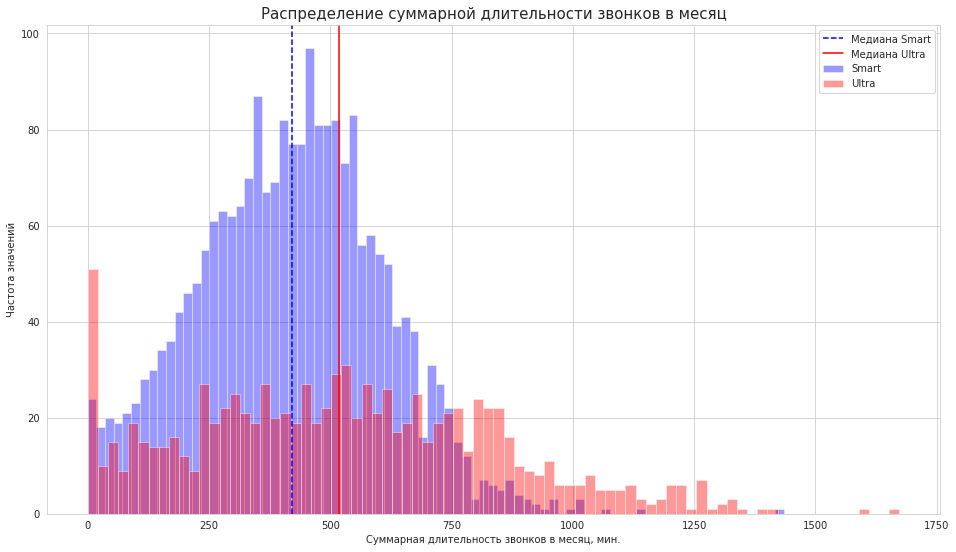

In [41]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,9))

plt.title('Распределение суммарной длительности звонков в месяц', fontsize=15)

sns.distplot(df_smart['calls_duration'], label='Smart', kde=False, color = 'blue', bins = 80)
sns.distplot(df_ultra['calls_duration'], label='Ultra', kde=False, color = 'red', bins = 80)

plt.axvline(np.median(df_smart['calls_duration']),color='b', linestyle='--', label='Медиана Smart')
plt.axvline(np.median(df_ultra['calls_duration']),color='r', linestyle='-', label='Медиана Ultra')

plt.xlabel('Суммарная длительность звонков в месяц, мин.')
plt.ylabel('Частота значений')

plt.legend()
plt.show()

Построим диаграмму размаха.

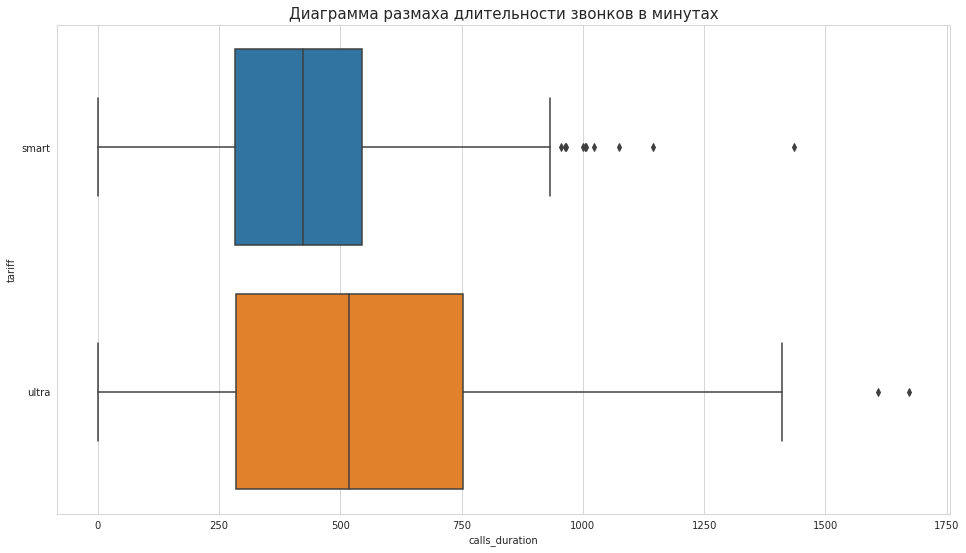

In [42]:
plt.figure(figsize = (16,9))
plt.title('Диаграмма размаха длительности звонков в минутах', fontsize = 15)
sns.boxplot(data = df_final, x = 'calls_duration', y = 'tariff')

#### Вывод

Судя по полученным данным пользователи обоих тарифов укладываются в границы по минутам, не переплачивая сверх абонетских данных. 
Если смотреть на гистограмму с диаграммой размаха, то видно, что пользователи тарифа "Ультра" более уверенно пользуются предоставленными возможностями тарифа из-за большего количества доступных минут. На это также указывает большее значение среднего отклонения. Большинство пользователей тарифа "Смарт" показывают свою практически идеальную точность в использовании минут, чтобы не выходить за рамки абоненсткой платы.
На гистограмме видно очевидное превосходство по количеству пользователей тарифа "Смарт".

### Количество сообщений

Опишем поведение клиентов по количеству сообщений по каждому из месяцев для каждого из тарифов.
Посчитаем среднее, медиану, дисперсию и среднее отклонение для этого показателя для каждого из тарифов.

In [44]:
df_final.pivot_table(index='tariff',  
                 values=['calls_duration', 'gb_used', 'messages_count'], 
                 aggfunc=['mean', 'std', 'var']).T.style.format('{:.2f}')

Построим гистограмму для этого показателя.

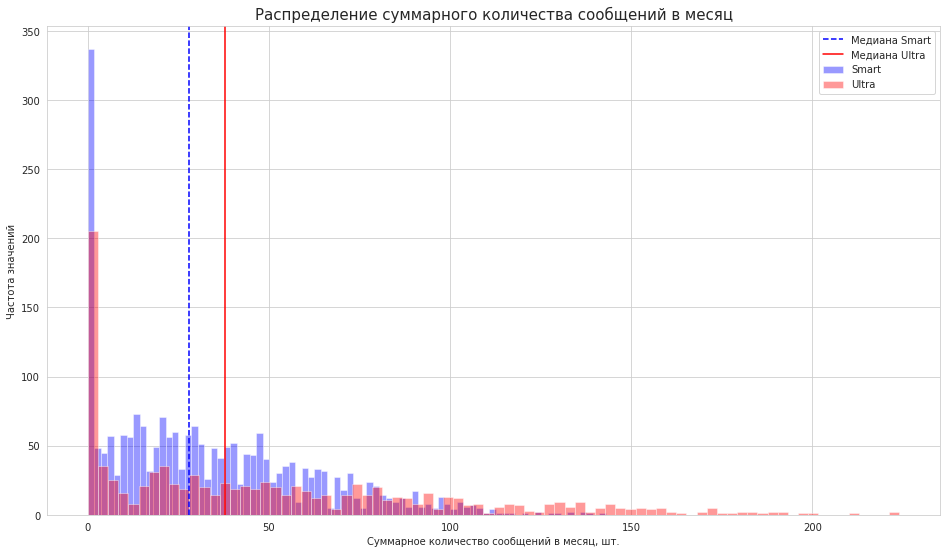

In [45]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,9))

plt.title('Распределение суммарного количества сообщений в месяц', fontsize=15)

sns.distplot(df_smart['messages_count'], label='Smart', kde=False, color = 'blue', bins = 80)
sns.distplot(df_ultra['messages_count'], label='Ultra', kde=False, color = 'red', bins = 80)

plt.axvline(np.median(df_smart['messages_count']),color='b', linestyle='--', label='Медиана Smart')
plt.axvline(np.median(df_ultra['messages_count']),color='r', linestyle='-', label='Медиана Ultra')

plt.xlabel('Суммарное количество сообщений в месяц, шт.')
plt.ylabel('Частота значений')

plt.legend()

Построим диаграмму размаха.

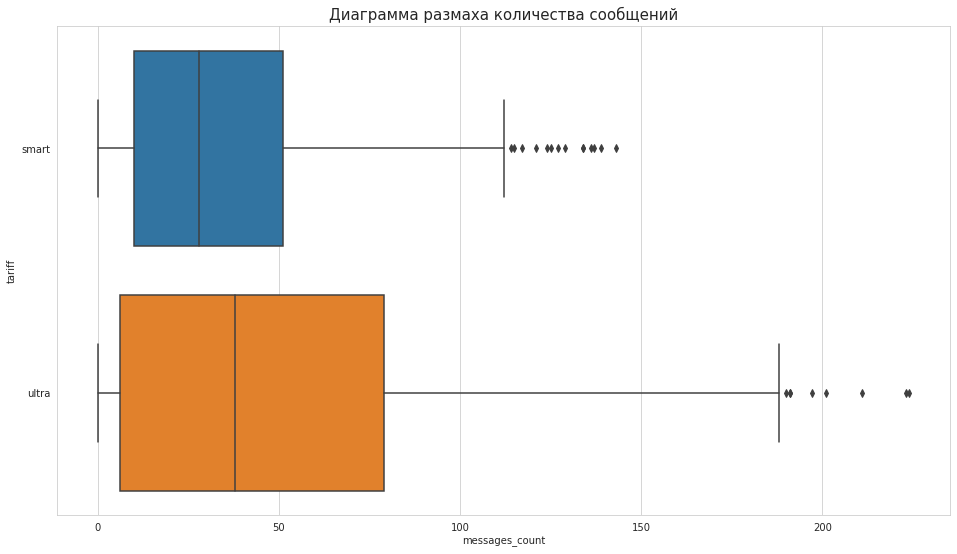

In [46]:
plt.figure(figsize = (16,9))
plt.title('Диаграмма размаха количества сообщений', fontsize = 15)
sns.boxplot(data = df_final, x = 'messages_count', y = 'tariff')

#### Вывод

Здесь наблдается аналогичная картина, как и с длительностью звонков. Только можно заметить, что ни один из пользователей тарифа "Ультра" не использовал весь пакет доступных сообщений. Только единицы наотправляли около 240 сообщений при размере пакета в 1000. Это говорит о тои, что SMS-сообщения сейчас далеко не самый популярный способ общения, так как все пользуются в основном мессенджерами. Скорее всего компания специально пользуется таким неоправдано большим пакетом сообщений для повышения цены тарифа.

### Объем интернет-трафика

Опишем поведение клиентов по трате интернет-трафика по каждому из месяцев для каждого из тарифов.
Посчитаем среднее, медиану, дисперсию и среднее отклонение для этого показателя для каждого из тарифов.

In [47]:
print('Сатистические показатели суммарной траты интернет-трафика для тарифа "Смарт"')

print('Среднее арифметическое: {:.0f}'.format(df_smart['gb_used'].mean()))
print('Медиана: {:.0f}'.format(df_smart['gb_used'].median()))
print('Дисперсия: {:.0f}'.format(np.var(df_smart['gb_used'])))
print('Среднее отклонение: {:.0f} \n'.format(np.std(df_smart['gb_used'])))
    
print('Сатистические показатели суммарной траты интернет-трафика для тарифа "Ультра"')


print('Среднее арифметическое: {:.0f}'.format(df_ultra['gb_used'].mean()))
print('Медиана: {:.0f}'.format(df_ultra['gb_used'].median()))
print('Дисперсия: {:.0f}'.format(np.var(df_ultra['gb_used'])))
print('Среднее отклонение: {:.0f} \n'.format(np.std(df_ultra['gb_used'])))

Сатистические показатели суммарной траты интернет-трафика для тарифа "Смарт"
Среднее арифметическое: 16
Медиана: 17
Дисперсия: 33
Среднее отклонение: 6 

Сатистические показатели суммарной траты интернет-трафика для тарифа "Ультра"
Среднее арифметическое: 19
Медиана: 19
Дисперсия: 97
Среднее отклонение: 10 



Построим гистограмму для этого показателя.

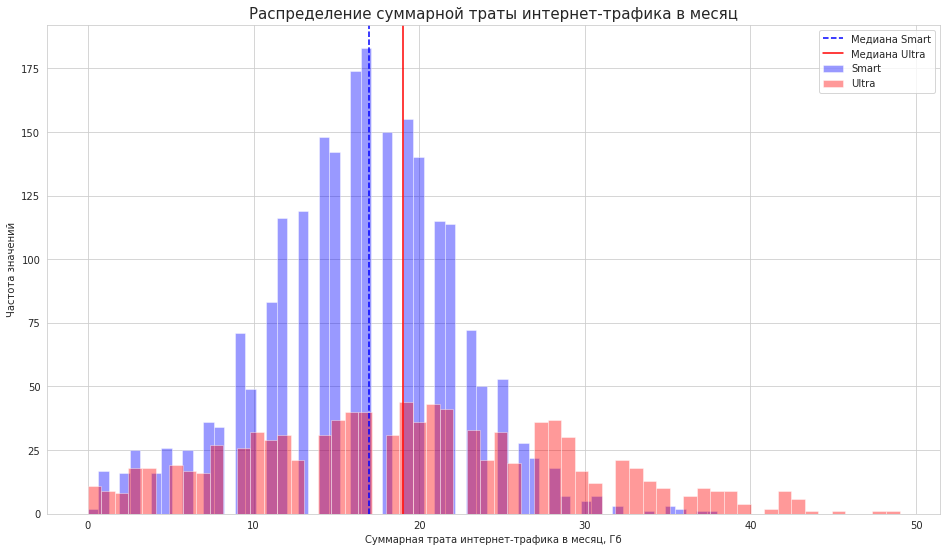

In [48]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,9))

plt.title('Распределение суммарной траты интернет-трафика в месяц', fontsize=15)

sns.distplot(df_smart['gb_used'], label='Smart', kde=False, color = 'blue', bins = 60)
sns.distplot(df_ultra['gb_used'], label='Ultra', kde=False, color = 'red', bins = 60)

plt.axvline(np.median(df_smart['gb_used']),color='b', linestyle='--', label='Медиана Smart')
plt.axvline(np.median(df_ultra['gb_used']),color='r', linestyle='-', label='Медиана Ultra')

plt.xlabel('Суммарная трата интернет-трафика в месяц, Гб')
plt.ylabel('Частота значений')

plt.legend()

Построим диаграмму размаха.

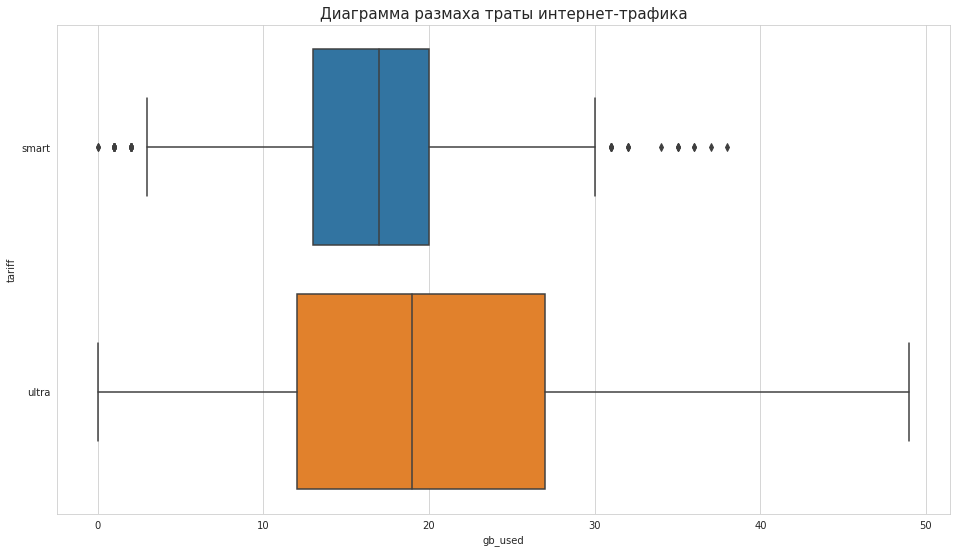

In [49]:
plt.figure(figsize = (16,9))
plt.title('Диаграмма размаха траты интернет-трафика', fontsize = 15)
sns.boxplot(data = df_final, x = 'gb_used', y = 'tariff')

#### Вывод

Статистические показатели этой переменной рисуют похожую картину, как и с другими переменными. 
Тут только можно посоветовать клинтам "Смарт", которые тратят больше 20 Гб трафика, перейти на тариф "Ультра" во избежания больших переплат.

### Вывод

Все статистические показатели значений тарифа "Ультра" больше, чем у тарифа "Смарт".
* Сатистические показатели длительности звонка в минутах для тарифа "Смарт"/"Ультра":
    * среднее арифметическое - 418/527;
    * медиана - 422/518;
    * дисперсия - 36203/100771;
    * среднее отклонение - 190/317.
* Сатистические показатели количества сообщений для тарифа "Смарт"/"Ультра":
    * среднее арифметическое - 33/49;
    * медиана - 28/38;
    * дисперсия - 796/2283;
    * среднее отклонение - 28/48.
* Сатистические показатели суммарной траты интернет-трафика для тарифа "Смарт"/"Ультра":
    * среднее арифметическое - 16/19;
    * медиана - 17/19;
    * дисперсия - 33/97;
    * среднее отклонение - 6/10.
    
По этим данным, гистограммам и диаграммам размаха можно сделать вывод, что пользователи тарифа "Ультра" более активны в использовании предоставленных пакетов услуг, так как объем этих пакетов существенно больше, чем у тарифа "Смарт". 
Также можно точно посоветовать клиентам тарифа "Смарт", которые на диаграммах размаха характеризуются выбросами, перейти на тариф "Ультра", чтобы избежать переплат.

## Проверка гипотез

### "Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются"

Посчитаем среднее, медиану, дисперсию и среднее отклонение для этого показателя для каждого из тарифов.

In [50]:
print('Сатистические показатели выручки пользователей для тарифа "Смарт"')

print('Среднее арифметическое: {:.0f}'.format(df_smart['profit'].mean()))
print('Медиана: {:.0f}'.format(df_smart['profit'].median()))
print('Дисперсия: {:.0f}'.format(np.var(df_smart['profit'])))
print('Среднее отклонение: {:.0f} \n'.format(np.std(df_smart['profit'])))
    
print('Сатистические показатели выручки пользователей для тарифа "Ультра"')


print('Среднее арифметическое: {:.0f}'.format(df_ultra['profit'].mean()))
print('Медиана: {:.0f}'.format(df_ultra['profit'].median()))
print('Дисперсия: {:.0f}'.format(np.var(df_ultra['profit'])))
print('Среднее отклонение: {:.0f} \n'.format(np.std(df_ultra['profit'])))

Сатистические показатели выручки пользователей для тарифа "Смарт"
Среднее арифметическое: 1290
Медиана: 1023
Дисперсия: 669485
Среднее отклонение: 818 

Сатистические показатели выручки пользователей для тарифа "Ультра"
Среднее арифметическое: 2070
Медиана: 1950
Дисперсия: 141373
Среднее отклонение: 376 



Построим гистограмму занчений по выручке каждого из тарифов.

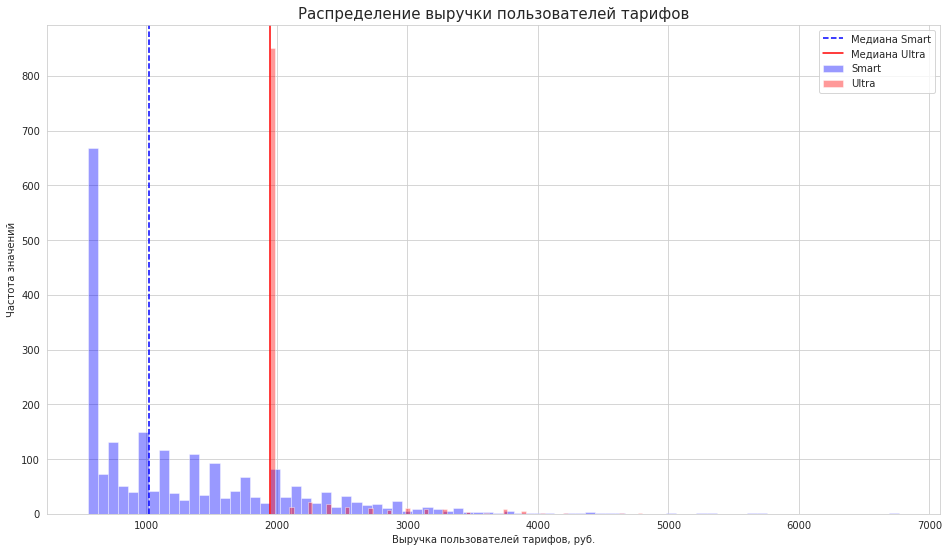

In [51]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,9))

plt.title('Распределение выручки пользователей тарифов', fontsize=15)

sns.distplot(df_smart['profit'], label='Smart', kde=False, color = 'blue', bins = 80)
sns.distplot(df_ultra['profit'], label='Ultra', kde=False, color = 'red', bins = 80)

plt.axvline(np.median(df_smart['profit']),color='b', linestyle='--', label='Медиана Smart')
plt.axvline(np.median(df_ultra['profit']),color='r', linestyle='-', label='Медиана Ultra')

plt.xlabel('Выручка пользователей тарифов, руб.')
plt.ylabel('Частота значений')

plt.legend()

По этому распределению видно, что пользователи тарифа "Смарт" больше переплачивают сверх абонентской платы в отличии от пользователей тарифа "Смарт". Причем судя по статистическим показателям пользователи тарифа "Смарт" в среднем платят 1290 рублей, что сильно отличается от абонентской платы, в отличие от пользователей тарифа "Ультра".

Выведем количество пользователей каждого тарифа и годовую выручку пользователей каждого тарифа.

In [52]:
print('Количество пользователей с тарифом "Смарт": {} человек'.format(len(df_users[df_users['tariff'] == 'smart'])))
print('Количество пользователей с тарифом "Ультра": {} человек'.format(len(df_users[df_users['tariff'] == 'ultra'])))

print('Общая выручка пользоватлей с тарифом "Cмарт": {} руб.'.format(df_smart['profit'].sum()))
print('Общая выручка пользоватлей с тарифом "Ультра": {} руб.'.format(df_ultra['profit'].sum()))

Количество пользователей с тарифом "Смарт": 351 человек
Количество пользователей с тарифом "Ультра": 149 человек
Общая выручка пользоватлей с тарифом "Cмарт": 2875351.0 руб.
Общая выручка пользоватлей с тарифом "Ультра": 2039100.0 руб.


Сформулируем нулевую гипотезу $H_{0}$:
 * средняя выручка пользователей тарифа «Ультра» равна средней выручке пользователей тарифа «Смарт».

Значит альтернативная гипотеза $H_{1}$:
 * средняя выручка пользователей тарифа «Ультра» не равна средней выручке пользователей тарифа «Смарт».
 
Уровень статистической значимости примем как 5%.

In [53]:
alpha = .05

results = st.ttest_ind(
    df_final[df_final['tariff'] == 'smart']['profit'], 
    df_final[df_final['tariff'] == 'ultra']['profit'], 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


На имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу в пользу альтернативы. Cредняя выручка пользователей тарифа «Ультра» не равна средней выручке пользователей тарифа «Смарт».

Выведем эти средние значения, чтобы проверить наши вычисления.

In [54]:
print('Средняя выручка пользователей тарифа "Смарт": {} руб.'.format(df_final[df_final['tariff'] == 'smart']['profit'].mean()))
print('Средняя выручка пользователей тарифа "Ультра": {} руб.'.format(df_final[df_final['tariff'] == 'ultra']['profit'].mean()))

Средняя выручка пользователей тарифа "Смарт": 1289.9735307312696 руб.
Средняя выручка пользователей тарифа "Ультра": 2070.1522842639592 руб.


Действительно, эти значения сильно различаются.

### "Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"

Сформулируем нулевую гипотезу $H_{0}$:
 * средняя выручка пользователей из Москвы равна от выручки пользователей из других регионов.

Значит альтернативная гипотеза $H_{1}$:
 * средняя выручка пользователей из Москвы не равна от выручки пользователей из других регионов.
 
Уровень статистической значимости примем как 5%.

In [55]:
alpha = .05

results = st.ttest_ind(
    df_final[df_final['city'] == 'Москва']['profit'], 
    df_final[df_final['city'] != 'Москва']['profit'], 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


На имеющихся данных, на уровне значимости 5% нет основания отвергнуть нулевую гипотезу в пользу альтернативы. Средняя выручка пользователей из Москвы равна от выручки пользователей из других регионов.

Выведем эти средние значения, чтобы проверить наши вычисления.

In [56]:
print('Cредняя выручка пользователей из Москвы: {} руб.'.format(df_final[df_final['city'] == 'Москва']['profit'].median()))
print('Cредняя выручка пользователей из регионов: {} руб.'.format(df_final[df_final['city'] != 'Москва']['profit'].median()))

Cредняя выручка пользователей из Москвы: 1750.0 руб.
Cредняя выручка пользователей из регионов: 1583.0 руб.


Действительно показатели по своим значениям довольно близки.

## Вывод

В этом проекте мы произвели предобработку данных из разных источников для их объединения в общую таблицу, где была следующая информация:
 * id клиента;
 * длительность звонков за месяц в минутах;
 * количество отправленных сообщений за месяц;
 * объем израсходованного графика за месяц;
 * выручка пользователей за месяц;
 * число месяца;
 * город в котором проживает клиент.
 
В ходе анализа данных сделали вывод, что пользователи тарифа "Смарт" более активны в использовании пакетов услуг, так как они имеют большие объеиы этих пакетов; клиенты мало пользуются отправкой сообщений и, что, скорее всего, пакет сообщений в тарифе "Ультра" компания сделала специально большим для повышения цены тарифа, хотя никто из предоставленных клиентов не использовал хотя бы его четверть; клиенты тарифа "Смарт" больше подвержены переплатам сверх абонентской платы; пользователей тарифа "Смарт" значительно больше, что обуславливает получения с них большей выручки в год, хотя средняя выручка пользователей в месяц больше у тарифа "Ультра".

По моему мнению, упор нужно сделать на тариф "Смарт", так как в сравнении с "Ультра" он стоит ощутимо меньше, но как бы люди не старались держаться в рамках абонентской платы они все равно в среднем переплачивают больше, чем в два раза, когда пользователи "Ультра" в среднем придерживаются рамок пакетов услуг. Из-за такой разницы в цене тарифов люди предпочитают более дешевый "Смарт", значит больше клиентов "Смарта" и, следовательно, больше переплат и больше выручки.
Тариф "Смарт" можно сделать чуть привлекательней, например, добавив в его пакет на сотню больше сообщений без изменения цены тарифа, так как ими все-равно мало кто пользуется, а на буклете эта цифра будет выглядеть весомой.

В ходе проверки гипотез отвергли нулевую гипотезу, что средняя выручка пользователей тарифов «Ультра» и «Смарт» равны и не смогли отвергнуть гипотезу, что средняя выручка пользователей из Москвы равна от выручки пользователей из других регионов.